In [1]:
import numpy as np 
import pandas as pd 
import sys
import networkx as nx 
import matplotlib.pyplot as plt
import seaborn as sns 
from constants import ROOT_DIR

# setting the path of this notebook to the root directory
sys.path.append(ROOT_DIR)
# import libraries custom in this repository
import methods.DataIO as DataIO
import methods.GromovWassersteinFramework as GWL
import dev.generate_util as Gen

sns.set()
%matplotlib inline

Gromov-Wasserstein Discrepancy (Uniform Node Distributions)

In [2]:
MM = 1000

OT_DICT = {'loss_type': 'L2',  # the key hyperparameters of GW distance
            'ot_method': 'proximal',
            'beta': 0.01,
            'outer_iteration': 3000,  # outer, inner iteration, error bound of optimal transport
            'iter_bound': 1e-30,
            'inner_iteration': 1,
            'sk_bound': 1e-30,
            'max_iter': 1,  # iteration and error bound for calcuating barycenter
            'cost_bound': 1e-16,
            'update_p': False,  # optional updates of source distribution
            'lr': 0.1,
            'node_prior': None,
            'alpha': 0,
            'test_mode': True}

In [3]:
line_g = nx.Graph(Gen.gen_line_graph(5))
star_g = nx.Graph(Gen.gen_star_graph(5))
cycle_g = nx.Graph(Gen.gen_cycle_graph(5))

In [4]:
def gwd_wrapper(graph, ot_dict): 
    p_s, cost_s, _ = DataIO.extract_graph_info(graph)
    print(f"Probability Vector: {p_s.T}")
    p_s /= np.sum(p_s)
    cost_s = cost_s + cost_s.T
    p_t, cost_t, _ = DataIO.extract_graph_info(graph)
    p_t /= np.sum(p_t)
    cost_t = cost_t + cost_t.T
    trans = None 
    d_gw = None
    for i in range(5): 
        trans, d_gw, _ = GWL.gromov_wasserstein_discrepancy(cost_s, cost_t, p_s, p_t, ot_dict)
    return trans, d_gw

In [5]:
def display_graphics(graph, ot_dict): 
    nx.draw(graph)
    trans, d_gw = gwd_wrapper(graph, ot_dict)
    print(f"Number of iterations: {len(d_gw)}")
    print(f"Value of GWD: {np.mean(d_gw)}")
    print("Transport Matrix:")
    print(pd.DataFrame(trans))
    plt.figure()
    plt.imshow(trans)
    plt.colorbar()

Probability Vector: [[1. 2. 2. 2. 1.]]
Number of iterations: 1000
Value of GWD: 0.6878372883663784
Transport Matrix:
              0             1             2             3             4
0  6.248498e-02  2.053308e-15  3.003488e-05  2.053308e-15  6.248498e-02
1  1.767083e-13  1.250000e-01  4.907561e-24  1.250000e-01  1.767083e-13
2  3.004305e-05  5.704021e-26  2.499399e-01  5.704021e-26  3.004305e-05
3  1.767083e-13  1.250000e-01  4.907561e-24  1.250000e-01  1.767083e-13
4  6.248498e-02  2.053308e-15  3.003488e-05  2.053308e-15  6.248498e-02


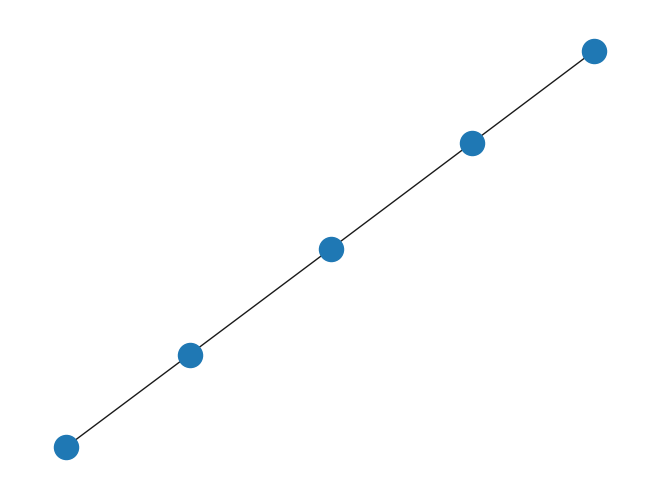

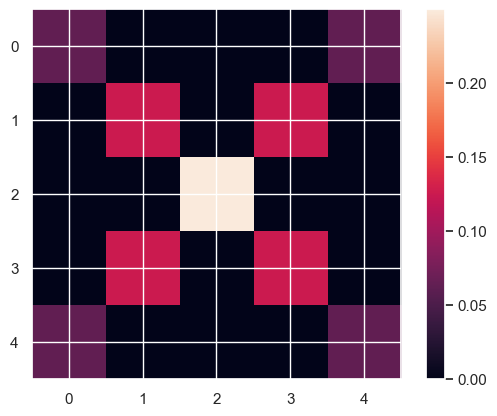

In [6]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'entropy'
display_graphics(line_g, OT_DICT)

Probability Vector: [[2. 2. 2. 2. 2.]]
Number of iterations: 1
Value of GWD: 1.28
Transport Matrix:
      0     1     2     3     4
0  0.04  0.04  0.04  0.04  0.04
1  0.04  0.04  0.04  0.04  0.04
2  0.04  0.04  0.04  0.04  0.04
3  0.04  0.04  0.04  0.04  0.04
4  0.04  0.04  0.04  0.04  0.04


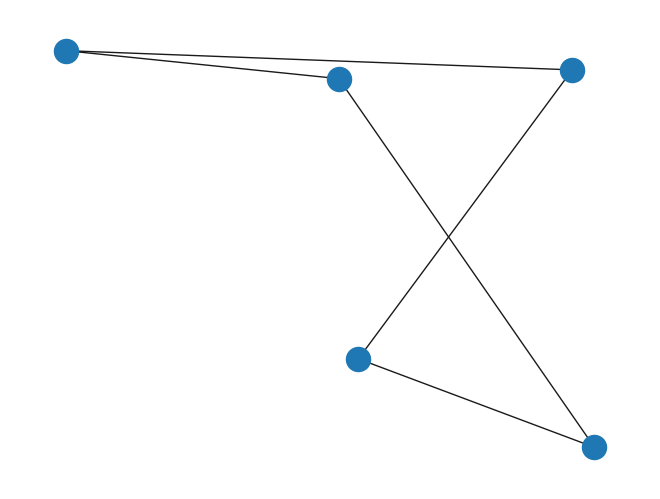

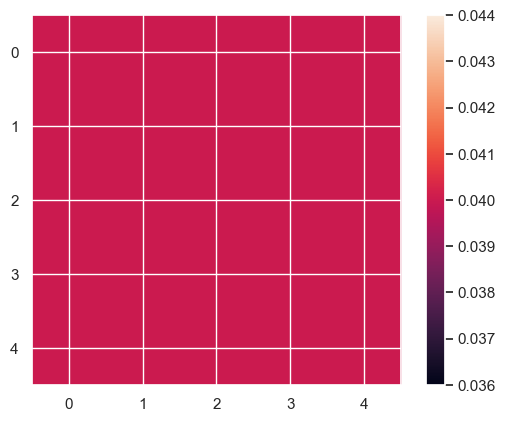

In [7]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'entropy'
display_graphics(cycle_g, OT_DICT)

Probability Vector: [[1. 1. 1. 4. 1.]]
Number of iterations: 1000
Value of GWD: 1.5065590947784835
Transport Matrix:
              0             1             2             3             4
0  3.541864e-15  3.541864e-15  3.541864e-15  1.250000e-01  3.541864e-15
1  3.541864e-15  3.541864e-15  3.541864e-15  1.250000e-01  3.541864e-15
2  3.541864e-15  3.541864e-15  3.541864e-15  1.250000e-01  3.541864e-15
3  1.250000e-01  1.250000e-01  1.250000e-01  8.508716e-10  1.250000e-01
4  3.541864e-15  3.541864e-15  3.541864e-15  1.250000e-01  3.541864e-15


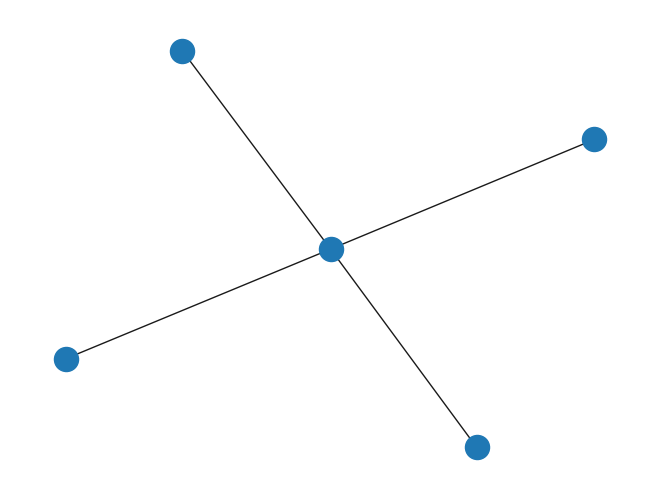

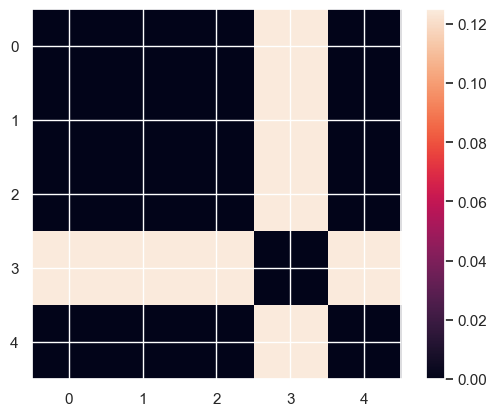

In [8]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'entropy'
display_graphics(star_g, OT_DICT)

Probability Vector: [[1. 1. 1. 4. 1.]]
Number of iterations: 19
Value of GWD: 1.8402015853766052
Transport Matrix:
              0             1             2             3             4
0  4.955529e-72  4.955529e-72  4.955529e-72  1.250000e-01  4.955529e-72
1  4.955529e-72  4.955529e-72  4.955529e-72  1.250000e-01  4.955529e-72
2  4.955529e-72  4.955529e-72  4.955529e-72  1.250000e-01  4.955529e-72
3  1.250000e-01  1.250000e-01  1.250000e-01  7.244889e-47  1.250000e-01
4  4.955529e-72  4.955529e-72  4.955529e-72  1.250000e-01  4.955529e-72


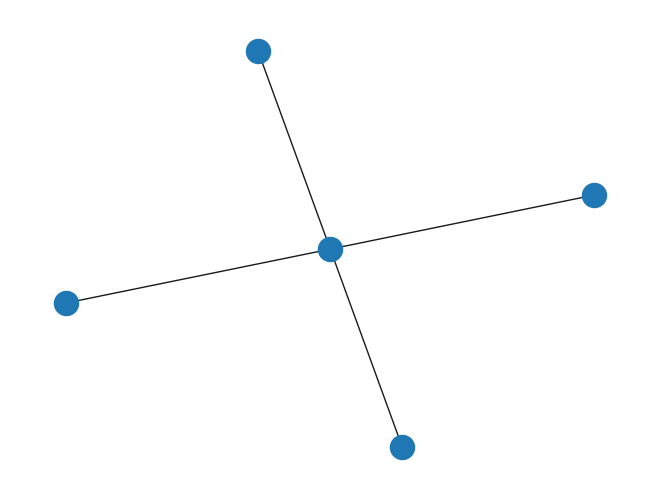

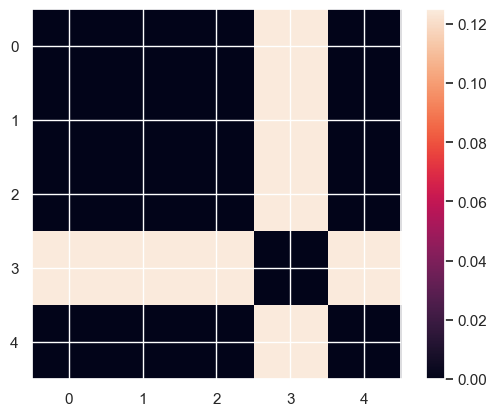

In [9]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'proximal'
display_graphics(star_g, OT_DICT)

Probability Vector: [[1. 1. 1. 4. 1.]]
Number of iterations: 196
Value of GWD: 1.5287609593533964
Transport Matrix:
              0             1             2             3             4
0  3.125000e-02  3.125000e-02  3.125000e-02  5.370394e-32  3.125000e-02
1  3.125000e-02  3.125000e-02  3.125000e-02  5.370394e-32  3.125000e-02
2  3.125000e-02  3.125000e-02  3.125000e-02  5.370394e-32  3.125000e-02
3  5.944519e-31  5.944519e-31  5.944519e-31  5.000000e-01  5.944519e-31
4  3.125000e-02  3.125000e-02  3.125000e-02  5.370394e-32  3.125000e-02


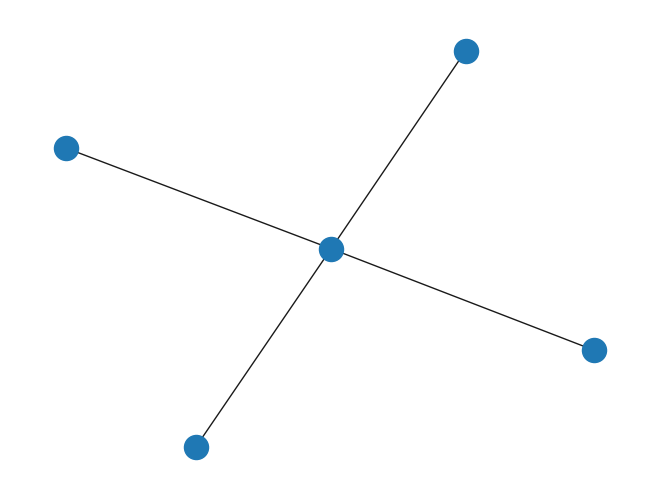

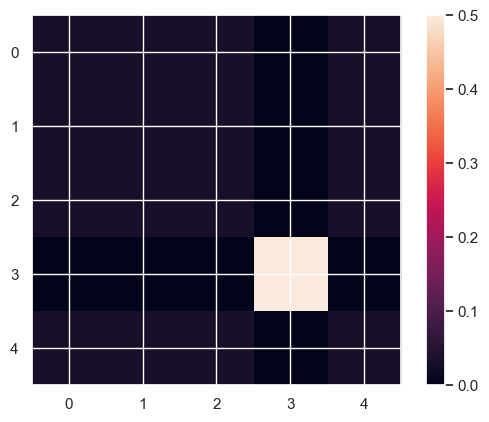

In [10]:
OT_DICT['beta'] = 10
OT_DICT['outer_iteration'] = 10
OT_DICT['inner_iteration'] = MM
OT_DICT['ot_method'] = 'b-admm'
display_graphics(star_g, OT_DICT)

Experiment: Perturb the distribution of the nodes so that there is a distinct correspondence

Pre-Transformation:  [[2. 2. 2. 2. 2.]]
Post-Transformation: [[1. 2. 3. 4. 5.]]
Normalized:[[0.06666667 0.13333333 0.2        0.26666667 0.33333333]]
Number of Iterations: 1000
Value of GWD: 0.889282640511572
Value of Transport Matrix:
          0         1    2         3         4
0  0.066667  0.000000  0.0  0.000000  0.000000
1  0.000000  0.133333  0.0  0.000000  0.000000
2  0.000000  0.000000  0.2  0.000000  0.000000
3  0.000000  0.000000  0.0  0.266667  0.000000
4  0.000000  0.000000  0.0  0.000000  0.333333


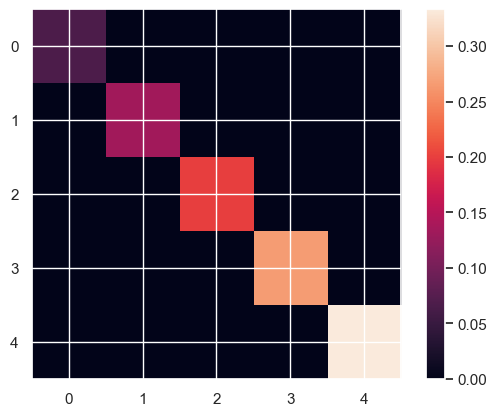

In [11]:
p, cost, _ = DataIO.extract_graph_info(cycle_g)
print(f"Pre-Transformation:  {p.T}")
p[:, 0] = np.array([1, 2, 3, 4, 5])
print(f"Post-Transformation: {p.T}")
p /= np.sum(p)
cost = cost + cost.T
print(f"Normalized:{p.T}")

# Set parameters for proximal point algorithm
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'proximal'
trans, gwd, _ = GWL.gromov_wasserstein_discrepancy(cost, cost, p, p, OT_DICT)

print(f"Number of Iterations: {len(gwd)}")
print(f"Value of GWD: {np.mean(gwd)}")
print(f"Value of Transport Matrix:")
print(pd.DataFrame(trans))
plt.imshow(trans)
plt.colorbar()

Probability Vector: [[1. 2. 2. 3. 1. 2. 1.]]
Number of iterations: 1000
Value of GWD: 0.6395662359236647
Transport Matrix:
          0         1         2     3         4         5         6
0  0.083333  0.000000  0.000000  0.00  0.000000  0.000000  0.000000
1  0.000000  0.166667  0.000000  0.00  0.000000  0.000000  0.000000
2  0.000000  0.000000  0.166667  0.00  0.000000  0.000000  0.000000
3  0.000000  0.000000  0.000000  0.25  0.000000  0.000000  0.000000
4  0.000000  0.000000  0.000000  0.00  0.083333  0.000000  0.000000
5  0.000000  0.000000  0.000000  0.00  0.000000  0.166667  0.000000
6  0.000000  0.000000  0.000000  0.00  0.000000  0.000000  0.083333


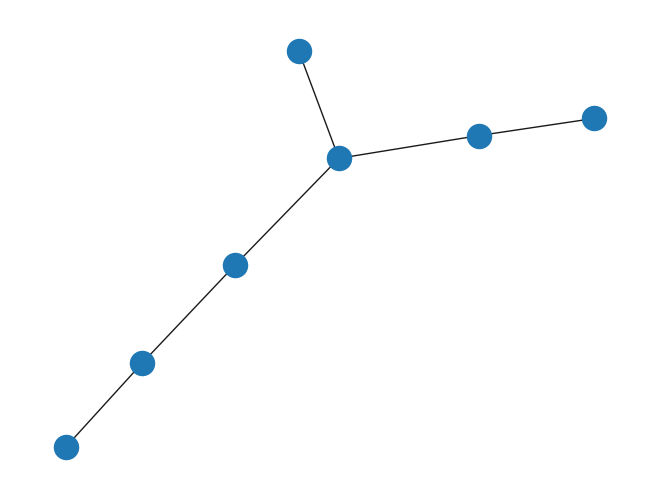

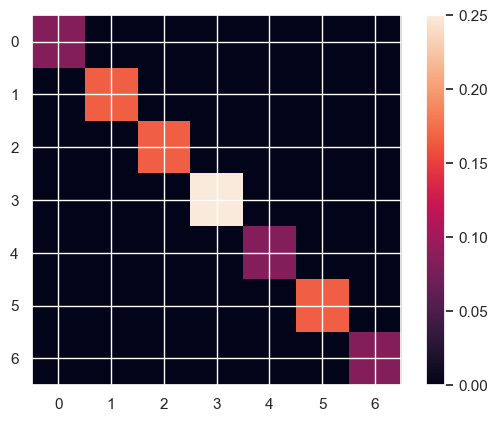

In [12]:
mat = np.full((7, 7), 0)
mat[0, 1] = 1
mat[1, 2] = 1
mat[2, 3] = 1
mat[3, 4] = 1
mat[3, 5] = 1
mat[5, 6] = 1
mat = mat + mat.T
custom_g = nx.Graph(mat)
display_graphics(custom_g, OT_DICT)

Experiment: Consider an initial transport for the cycle graph that is diagonal matrix. 

Number of Iterations: 1
Value of GWD: 0.8000000000000002
Value of Transport Matrix:
     0    1    2    3    4
0  0.2  0.0  0.0  0.0  0.0
1  0.0  0.2  0.0  0.0  0.0
2  0.0  0.0  0.2  0.0  0.0
3  0.0  0.0  0.0  0.2  0.0
4  0.0  0.0  0.0  0.0  0.2

Analyzing GWD according to equation (6)...
Total distance should be 0.


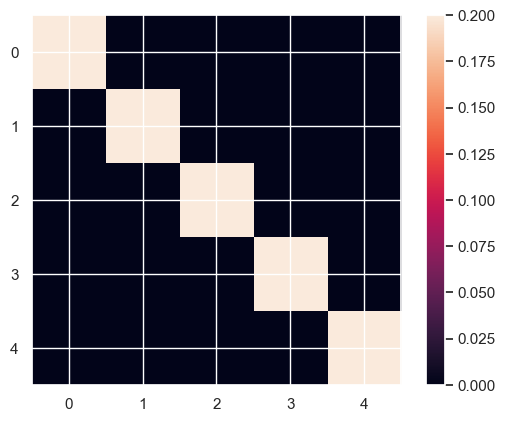

In [13]:
OT_DICT['beta'] = 1e-2
OT_DICT['outer_iteration'] = MM
OT_DICT['inner_iteration'] = 10
OT_DICT['ot_method'] = 'proximal'

p, cost, _ = DataIO.extract_graph_info(cycle_g)
p /= np.sum(p)
cost = cost + cost.T
init_trans = np.eye(5) * 0.2
trans, gwd, _ = GWL.gromov_wasserstein_discrepancy(cost, cost, p, p, OT_DICT, init_trans)
print(f"Number of Iterations: {len(gwd)}")
print(f"Value of GWD: {np.mean(gwd)}")
print(f"Value of Transport Matrix:")
print(pd.DataFrame(trans))
plt.imshow(trans)
plt.colorbar()

print("\nAnalyzing GWD according to equation (6)...")
total = 0
for i in range(5): 
    for j in range(5): 
        for k in range(5): 
            for l in range(5): 
                curr = abs(cost[i, k] - cost[j, l]) ** 2 * init_trans[i, j] * init_trans[k, l]
                if curr > 0: 
                    print(f"Transporting from {(i, k)} to {(j, l)}")
                total += 0
print(f"Total distance should be {total}.")

In [14]:
p, cost, _ = DataIO.extract_graph_info(cycle_g)
p/= np.sum(p)
cost = cost + cost.T
cost_st = GWL.node_cost_st(cost, cost, p, p)

In [15]:
print("Unsparsify and then compute hadamond product...")
print(cost.toarray() ** 2)
print("\nCompute hadamond product (?) and then unsparify...")
print((cost ** 2).toarray())

Unsparsify and then compute hadamond product...
[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]

Compute hadamond product (?) and then unsparify...
[[2. 0. 1. 1. 0.]
 [0. 2. 0. 1. 1.]
 [1. 0. 2. 0. 1.]
 [1. 1. 0. 2. 0.]
 [0. 1. 1. 0. 2.]]
